<a href="https://colab.research.google.com/github/yoshito-ito/training/blob/master/test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow をインストール

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

     |████████████████████████████████| 348.9MB 50kB/s 
     |████████████████████████████████| 3.1MB 46.1MB/s 
     |████████████████████████████████| 501kB 64.0MB/s 


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc4


ここから


ドライブからファイル欲しかったら、、、

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 上記の方法で調べたファイルのID
file_id = "1g5ZfFNVRWfSrlL3HIW51jn9ZIpjwyK7m"
drive_file = drive.CreateFile({'id': file_id})

# ファイルの取得
drive_file.GetContentFile("lena.jpg")


そして、、、

ファイルから画像取り出す、それを保存

In [0]:
## ファイルにある「lena.jpg」画像ファイルを読み込む
import cv2
lena = cv2.imread('/content/lena.jpg')

## googledriveの中から取り出すなら、/content/drive/My Drive/〇〇.jpg

In [0]:
import cv2

orig = cv2.imread('lena.jpg')
lena = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

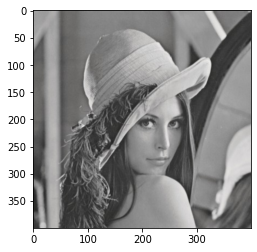

In [10]:
## 画像の表示
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(lena)

In [11]:
## 画像の保存
cv2.imwrite('/content/lena.jpg', lena)

True

lena400を作る

In [0]:
import cv2

orig = cv2.imread('lena.jpg')
lena400 = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

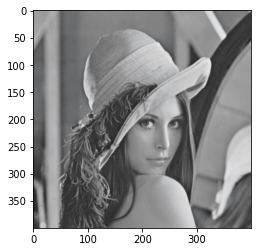

In [13]:
from matplotlib import pyplot as plt

plt.imshow(lena400)

In [15]:
## 画像の保存(resize_lenaというフォルダ作っておく)
cv2.imwrite('/content/resize_lena/lena400.jpg', lena400)

True

lena200を作る

In [0]:
import cv2
lena = cv2.imread('lena400.jpg')
width,height=200,200
lena200 = cv2.resize(lena400,(width,height))

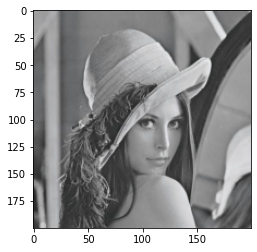

In [17]:
from matplotlib import pyplot as plt

plt.imshow(lena200)

In [18]:
## 画像の保存
cv2.imwrite('/content/resize_lena/lena200.jpg', lena200)

True

lena100を作る

In [0]:
import cv2
lena = cv2.imread('lena400.jpg')
width,height=100,100
lena100 = cv2.resize(lena400,(width,height))

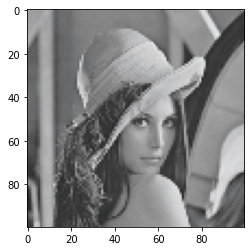

In [20]:
from matplotlib import pyplot as plt

plt.imshow(lena100)

In [21]:
## 画像の保存
cv2.imwrite('/content/resize_lena/lena100.jpg', lena100)

True

例えば、フォルダの画像すべてのサイズを3分の1に

lena400,200,100をすべて3分の1に　計6枚

(あらかじめresize_lenaに3枚のlena画像(400×400, 200×200, 100×100)が入れてあるところからスタート)

In [0]:
import os
import glob
from PIL import Image

files = glob.glob('/content/resize_lena/*.jpg')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((int(img.width / 3), int(img.height / 3)))
    title, ext = os.path.splitext(f)
    img_resize.save(title + '_third' + ext)

In [0]:
import cv2
lena400_third = cv2.imread('/content/resize_lena/lena400_third.jpg')

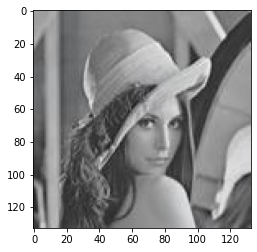

In [24]:
from matplotlib import pyplot as plt

plt.imshow(lena400_third)

今度は、そのフォルダの画像すべてにガウシアンノイズを付加

lena400,200,100とそれぞれを3分の1にしたものすべてにノイズ　計12枚

In [0]:
import cv2
import os
import glob
from PIL import Image, ImageFilter

files = glob.glob('/content/resize_lena/*.jpg')


for f in files:
    img = Image.open(f)
    img_gauss = img.filter(ImageFilter.GaussianBlur(1.5))
    title, ext = os.path.splitext(f)
    img_gauss.save(title + '_gauss' + ext)

In [0]:
import cv2
lena400_third_gauss = cv2.imread('/content/resize_lena/lena400_third_gauss.jpg')

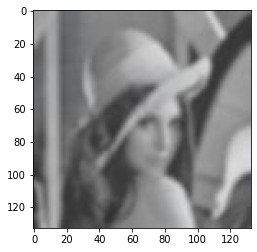

In [27]:
from matplotlib import pyplot as plt

plt.imshow(lena400_third_gauss)